In [26]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.figure_factory as ff

In [24]:
df = pd.read_csv('weatherAUS.csv.zip', compression='zip')
df = df.drop(['RainToday', 'Date'], axis=1)

In [3]:
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
83924,Dartmoor,6.8,24.7,0.0,NaN,NaN,ESE,19.0,ESE,S,...,4.0,97.0,40.0,1028.9,1025.6,NaN,NaN,11.9,23.5,No
116973,PearceRAAF,11.7,30.8,0.0,NaN,10.4,NE,44.0,N,NNE,...,28.0,29.0,22.0,1018.8,1014.5,NaN,NaN,21.2,30.7,No
72167,Mildura,17.2,40.4,0.0,12.0,12.8,W,31.0,WSW,W,...,15.0,52.0,12.0,1011.3,1009.4,0.0,1.0,21.4,38.7,No
141048,Darwin,23.6,31.2,14.6,5.2,1.5,NW,70.0,N,NW,...,20.0,87.0,81.0,1005.4,1002.5,7.0,8.0,26.6,28.7,Yes
26826,Penrith,13.5,16.6,23.8,NaN,NaN,SSW,30.0,SSW,NaN,...,0.0,98.0,98.0,NaN,NaN,NaN,NaN,15.8,16.5,Yes


In [4]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [5]:
# Задание 1: провести EDA (Explanatory Data Analysis)

# Желательно построить графики по некоторым, на ваш взгляд, ключевым признакам и целевой переменной,
# чтобы оценить данные, с которыми мы работаем. Это задание полностью творческое и будет оценено субъективно
# с точки зрения степени раскрытия инсайтов и "красивости" графиков и статистических расчетов

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [39]:
# По информационному графику видно, что во многих столюцах пропущены данные (NaN), поэтому делаем dropna
df = df.dropna()

df['RainTomorrow_int'] = np.where(df['RainTomorrow'] == 'Yes', 1, 0)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainTomorrow_int
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0


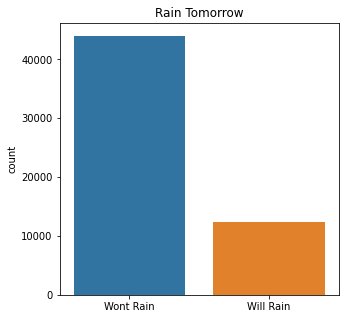

In [41]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df.RainTomorrow_int.values, data=df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Wont Rain'
labels[1] = 'Will Rain'
ax.set_xticklabels(labels)
ax.set_title('Rain Tomorrow')
plt.show()

# Судя по графику, есть большой перевес в сторону примеров данных с меткой Wont Rain, 
# скорее всего при обучении модель будет с большим количеством ошибок определять данные с лейблом Will Rain

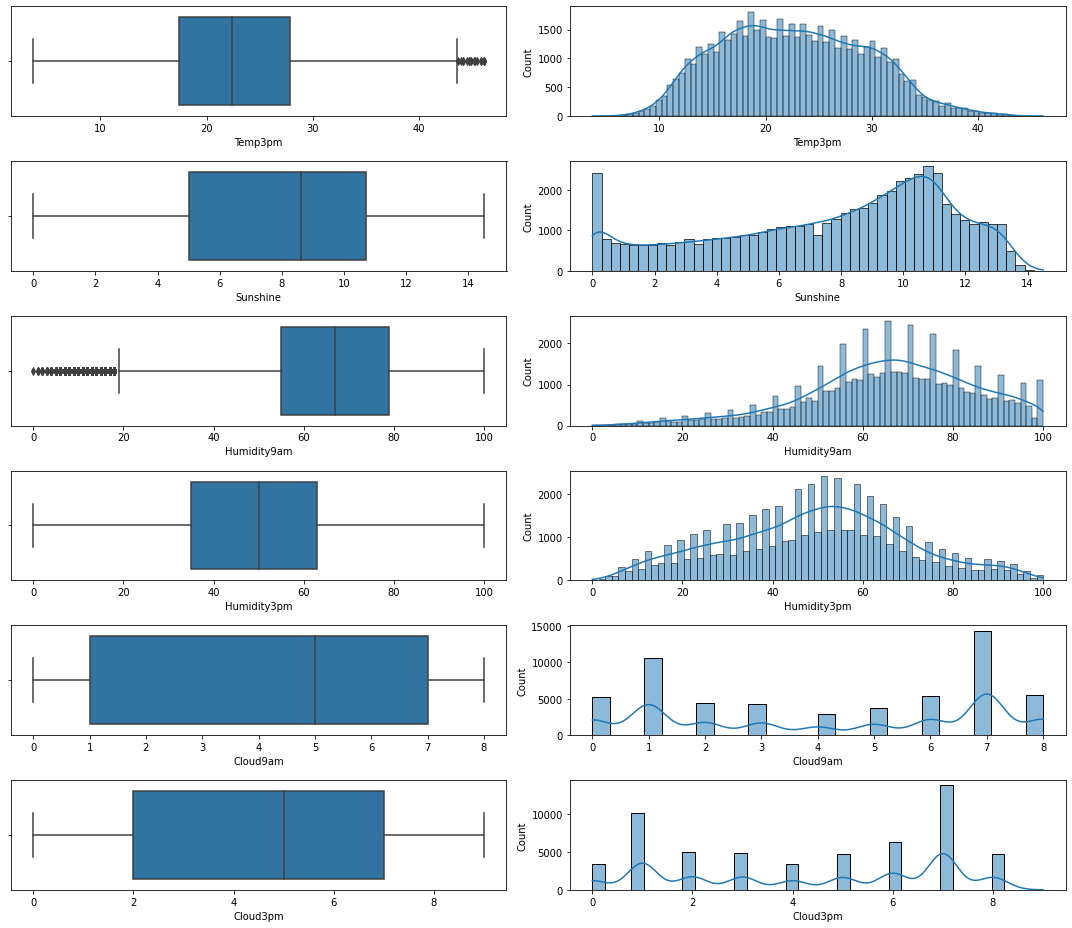

In [45]:
# Посмотрим на диапозон и распределение важных числовых переменных

fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df['Temp3pm'], ax=ax[0,0])
sns.histplot(df['Temp3pm'], ax=ax[0,1], kde=True)
sns.boxplot(x=df['Sunshine'], ax=ax[1,0])
sns.histplot(df['Sunshine'], ax = ax[1,1], kde=True)
sns.boxplot(x=df['Humidity9am'], ax=ax[2,0])
sns.histplot(df['Humidity9am'], ax=ax[2,1], kde=True)
sns.boxplot(x=df['Humidity3pm'], ax=ax[3,0])
sns.histplot(df['Humidity3pm'], ax=ax[3,1], kde=True)
sns.boxplot(x=df['Cloud9am'], ax=ax[4,0])
sns.histplot(df['Cloud9am'], ax=ax[4,1], kde=True)
sns.boxplot(x=df['Cloud3pm'], ax=ax[5,0])
sns.histplot(df['Cloud3pm'], ax=ax[5,1], kde=True)

plt.tight_layout()

In [7]:
df_yes = df[df['RainTomorrow_int'] == 1]
df_yes.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_int
count,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.0
mean,14.520286,22.285129,5.487302,4.599026,4.529597,46.727368,16.980204,21.209624,75.314959,66.905931,1013.926909,1011.816834,5.946729,6.261930,17.980309,20.348869,1.0
std,6.475014,6.866919,11.553907,3.155133,3.390385,15.453586,9.031452,9.284455,15.746792,18.449353,7.127063,7.163316,2.163760,1.840983,6.599997,6.712269,0.0
min,-4.700000,7.000000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,5.000000,1.000000,980.500000,977.100000,0.000000,0.000000,-0.100000,4.300000,1.0
25%,9.200000,16.800000,0.000000,2.200000,1.400000,35.000000,11.000000,15.000000,66.000000,55.000000,1009.300000,1007.000000,5.000000,6.000000,12.600000,14.900000,1.0
50%,14.000000,21.400000,0.800000,4.000000,4.300000,44.000000,15.000000,20.000000,77.000000,68.000000,1013.800000,1011.600000,7.000000,7.000000,17.300000,19.600000,1.0
75%,19.900000,27.800000,5.800000,6.400000,7.200000,56.000000,22.000000,28.000000,88.000000,81.000000,1018.600000,1016.500000,7.000000,7.000000,23.200000,25.400000,1.0
max,29.800000,46.800000,206.200000,43.000000,13.900000,122.000000,65.000000,65.000000,100.000000,100.000000,1039.500000,1036.000000,8.000000,8.000000,36.400000,46.100000,1.0


In [8]:
df_no = df[df['RainTomorrow_int'] == 0]
df_no.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_int
count,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000,43993.0
mean,13.166611,24.765538,1.182149,5.758525,8.641254,39.224877,15.296343,19.384857,63.207306,44.714023,1018.175237,1015.637006,3.760075,3.779806,18.268420,23.377392,0.0
std,6.368581,6.902305,4.617274,3.796570,3.338099,12.174093,8.065273,8.234055,18.363871,17.847462,6.549944,6.544964,2.767432,2.583256,6.557603,6.722703,0.0
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,982.900000,983.200000,0.000000,0.000000,-0.700000,3.700000,0.0
25%,8.400000,19.300000,0.000000,3.000000,6.700000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.700000,1011.000000,1.000000,1.000000,13.300000,18.100000,0.0
50%,13.000000,24.600000,0.000000,5.200000,9.500000,37.000000,15.000000,19.000000,64.000000,46.000000,1018.000000,1015.500000,3.000000,3.000000,17.900000,23.100000,0.0
75%,18.000000,30.100000,0.200000,7.800000,11.000000,46.000000,20.000000,24.000000,76.000000,58.000000,1022.500000,1020.100000,7.000000,6.000000,23.300000,28.500000,0.0
max,31.400000,48.100000,182.600000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,0.0


In [9]:
# Если смотреть по mean, то сильные различия есть в столбцах Rainfall, WindGustSpeed, Humidity9am, Humidity3pm

In [46]:
corrs = df.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

figure.show()

# По тепловой карте видно, что у переменной RainTomorrow нет сильной корреляции с другими переменными (не считая Sunshine),
# но можно увидеть сильную зависимость Sunshine от Cloud, Evaporation от MaxTemp и так далее 
# (если значение больше 0.5, то это уже говорит о средней зависимости, с 0.7 - высокая)

In [11]:
# Задание 2:

# Данные, которые мы видим, представлены в табличном формате и имеют несколько проблем, требующих решения:

# 1) Есть пропущенные значения (вероятно, некоторые колонки или строчки следовательно необходимо убрать)
# 2) Некоторые признаки представлены не в виде числовых данных (нужно закодировать с помощью Label Encoder)
# 3) Дизбаланс данных (не каждый метод оценки подойдет)
# 4) Данные имеют разный разброс. Вероятно, требуется скейлинг

In [12]:
df = df.drop(columns=['RainTomorrow']).rename(columns={'RainTomorrow_int': 'RainTomorrow'})

In [13]:
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
140623,6,20.2,33.9,0.0,7.0,10.9,3,37.0,4,6,...,26.0,45.0,31.0,1014.5,1009.9,2.0,4.0,28.5,32.4,0
76917,17,5.8,13.1,1.4,0.8,5.6,14,19.0,7,10,...,9.0,99.0,83.0,1029.2,1026.5,8.0,8.0,8.9,11.6,0
66800,9,10.0,20.7,0.0,2.8,2.2,3,80.0,5,3,...,39.0,62.0,48.0,1017.1,1012.5,7.0,7.0,15.9,20.4,0
104947,14,20.2,25.4,0.0,8.0,6.2,14,54.0,13,13,...,20.0,43.0,90.0,1014.1,1012.7,7.0,8.0,23.7,17.3,1
37696,22,3.6,22.1,0.0,3.0,11.2,15,22.0,1,15,...,13.0,67.0,32.0,1034.6,1030.5,0.0,0.0,11.5,21.9,0
101886,12,2.4,12.8,0.0,3.0,5.3,8,35.0,9,8,...,20.0,56.0,66.0,1030.2,1028.7,3.0,8.0,10.2,10.2,1
9620,5,4.5,18.2,0.0,2.8,9.8,11,31.0,12,9,...,15.0,60.0,57.0,1026.9,1024.5,1.0,1.0,13.9,17.2,0
23566,13,19.1,25.2,0.0,5.2,7.6,5,37.0,5,4,...,20.0,69.0,72.0,1015.9,1014.0,7.0,7.0,22.9,22.9,0
84302,1,16.5,27.2,1.0,4.2,9.8,10,31.0,11,11,...,11.0,62.0,43.0,1017.9,1014.4,2.0,3.0,21.9,26.5,0
118198,16,7.7,20.0,0.0,3.2,7.2,3,35.0,4,5,...,17.0,52.0,32.0,1027.8,1022.8,7.0,7.0,11.9,19.5,0


In [14]:
scaler = StandardScaler()
df[['Humidity9am', 'Humidity3pm']] = scaler.fit_transform(df[['Humidity9am', 'Humidity3pm']])
df[['MinTemp', 'MaxTemp']] = scaler.fit_transform(df[['MinTemp', 'MaxTemp']])
df[['Rainfall', 'WindGustSpeed']] = scaler.fit_transform(df[['Rainfall', 'WindGustSpeed']])
df[['Sunshine', 'Evaporation']] = scaler.fit_transform(df[['Sunshine', 'Evaporation']])
df[['WindSpeed9am', 'WindSpeed3pm']] = scaler.fit_transform(df[['WindSpeed9am', 'WindSpeed3pm']])
df[['Pressure9am', 'Pressure3pm']] = scaler.fit_transform(df[['Pressure9am', 'Pressure3pm']])
df[['Cloud9am', 'Cloud3pm']] = scaler.fit_transform(df[['Cloud9am', 'Cloud3pm']])
df[['Temp9am', 'Temp3pm']] = scaler.fit_transform(df[['Temp9am', 'Temp3pm']])

df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
132291,7,-0.773735,-1.853381,1.036330,-1.380625,-1.792286,8,0.984066,8,8,...,-0.327467,1.411208,1.208010,-0.135977,0.451826,1.343622,0.632165,-1.325373,-1.756800,1
104309,14,-0.088017,1.001460,-0.303702,0.675513,1.480627,9,-0.590724,9,0,...,-0.797496,-0.533358,-0.673470,-0.685961,-0.683408,-1.516445,-1.634357,-0.137785,0.217900,0
89347,2,2.015891,1.202303,0.466103,0.404968,-0.009480,15,-0.965674,15,3,...,-0.562482,0.763020,1.307036,-1.337257,-1.483893,1.343622,0.254411,1.658823,1.227191,0
118780,16,-0.539967,0.499353,-0.303702,-0.027903,0.815401,12,-0.140784,11,15,...,0.965114,-0.101232,-0.673470,0.153488,0.204403,-1.516445,-1.634357,0.273303,0.525075,0
78218,23,-1.007502,-1.207814,-0.303702,-0.460774,0.043738,3,-0.740704,6,6,...,-0.327467,0.492941,0.366295,1.485028,1.499734,-0.443920,-0.123342,-1.234020,-1.113194,0


In [15]:
X = df.drop(['RainTomorrow'], axis=1).values
y = df['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.25)

In [16]:
# Задание 3: Построить свой DataLoader

class DataLoader:

    def __init__(self, X_data, y_data, batch_size=64, shuffle=True):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.data_indexes = list(range(len(self.X_data)))
        if shuffle:
            np.random.shuffle(self.data_indexes)

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__(self):
        length = len(self.data_indexes)
        quotient = length // self.batch_size
        reminder = length % self.batch_size
        if reminder != 0:
            quotient += 1
        return quotient

    def __iter__(self):
        return self._create_our_iterator()

    def _create_our_iterator(self):
        # Это генераторная функция - вернёт генератор
        features = []
        labels = []
        n = 0
        for i in self.data_indexes:
            features.append(self.X_data[i])
            labels.append(self.y_data[i])
            n += 1
            if n == self.batch_size:
                yield features, labels
                n = 0
                features = []
                labels = []
        if features and labels:
            yield features, labels

In [17]:
train_loader = DataLoader(X_data=X_train, y_data=y_train)
test_loader = DataLoader(X_data=X_test, y_data=y_test)

In [18]:
class ShallowPerceptron(nn.Module):

    def __init__(self, n_features, hidden_size):
        super(ShallowPerceptron, self).__init__()

        self.layer_1 = nn.Linear(n_features, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_out = nn.Linear(hidden_size, 1)

        # Read about ReLU: https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning
        self.relu = nn.ReLU()

        # Read about Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, inputs):
        # Каждый слой по сути является функцией, в которую передаются некоторые input
        # Очередность: layer_1 --> relu --> layer_2 --> relu --> dropout --> layer_out
        x = self.layer_1(inputs)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [19]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

model = ShallowPerceptron(n_features=X_train.shape[1], hidden_size=100)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


ShallowPerceptron(
  (layer_1): Linear(in_features=20, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [20]:
# Задание 5: написать цикл обучения

# Переводим модель в режим "тренировки"
model.train()

# Одна эпоха - один полный проход по данным
for epoch in range(EPOCHS):

    # На каждой эпохе необходимо отслеживать суммарный лосс и считать метрику качества
    # В качестве метрики можно использовать F1 score
    epoch_loss = 0
    epoch_f1 = 0
    for X_batch, y_batch in train_loader:
        # Зануляем градиенты с предыдущего шага
        optimizer.zero_grad()

        # Делаем forward
        y_pred = model(torch.FloatTensor(np.array(X_batch)))

        # Считаем лосс с помощью нашего criterion
        y_batch = torch.FloatTensor(np.array(y_batch)).unsqueeze(1)
        loss = criterion(y_pred, y_batch)

        # Считаем метрику
        f1 = f1_score(y_batch, np.round(torch.sigmoid(y_pred).detach()), average='micro')

        # Делаем backpropagation
        loss.backward()

        # Изменяем веса
        optimizer.step()

        epoch_loss += loss.item()
        epoch_f1 += f1

    # Тут нужно вывести: Номер текущей эпохи | Лосс, усредненный на количество батчей | усредненный F1
    print(
        f'Epoch {epoch}: '
        f'loss = {round(epoch_loss / len(train_loader), 2)}, '
        f'F1 = {round(epoch_f1 / len(train_loader), 2)}'
    )

Epoch 0: loss = 0.36, F1 = 0.84
Epoch 1: loss = 0.34, F1 = 0.85
Epoch 2: loss = 0.33, F1 = 0.85
Epoch 3: loss = 0.33, F1 = 0.86
Epoch 4: loss = 0.32, F1 = 0.86
Epoch 5: loss = 0.32, F1 = 0.86
Epoch 6: loss = 0.32, F1 = 0.86
Epoch 7: loss = 0.32, F1 = 0.86
Epoch 8: loss = 0.32, F1 = 0.86
Epoch 9: loss = 0.31, F1 = 0.86
Epoch 10: loss = 0.31, F1 = 0.86
Epoch 11: loss = 0.31, F1 = 0.86
Epoch 12: loss = 0.31, F1 = 0.87
Epoch 13: loss = 0.31, F1 = 0.87
Epoch 14: loss = 0.31, F1 = 0.87
Epoch 15: loss = 0.3, F1 = 0.87
Epoch 16: loss = 0.3, F1 = 0.87
Epoch 17: loss = 0.3, F1 = 0.87
Epoch 18: loss = 0.3, F1 = 0.87
Epoch 19: loss = 0.3, F1 = 0.87
Epoch 20: loss = 0.3, F1 = 0.87
Epoch 21: loss = 0.3, F1 = 0.87
Epoch 22: loss = 0.29, F1 = 0.87
Epoch 23: loss = 0.29, F1 = 0.87
Epoch 24: loss = 0.29, F1 = 0.87
Epoch 25: loss = 0.29, F1 = 0.88
Epoch 26: loss = 0.29, F1 = 0.88
Epoch 27: loss = 0.29, F1 = 0.88
Epoch 28: loss = 0.29, F1 = 0.88
Epoch 29: loss = 0.29, F1 = 0.88
Epoch 30: loss = 0.28, F1 =

In [21]:
# Задание 6: Провести оценку на тестовых данных

model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_test_pred = model(torch.FloatTensor(np.array(X_batch)))
        # Нужно сохранять результаты
        y_pred.append(np.round(torch.sigmoid(y_test_pred).detach()))
        y_true.append(torch.FloatTensor(np.array(y_batch)).unsqueeze(1))

In [23]:
# Здесь считаем метрику на полученных предсказаниях
print(classification_report(torch.cat(y_true), torch.cat(y_pred), target_names=['Wont Rain', 'Will Rain']))

              precision    recall  f1-score   support

   Wont Rain       0.88      0.95      0.91     10979
   Will Rain       0.74      0.54      0.62      3126

    accuracy                           0.86     14105
   macro avg       0.81      0.74      0.77     14105
weighted avg       0.85      0.86      0.85     14105

